* 소셜네트워크 기말고사 2022.06.16 (목)

In [1]:
##################################################
############### 문제 풀기 전 주의사항 ##############
##################################################

# 시험시간 내 인터넷 사용 금지, 시험문제 다운로드, 업로드 시에만 가능
# (시험 중, 핸드폰이나 인터넷 사용을 포함한 부정행위 적발시 0점 처리).

# ipynb 시험파일, html 시험파일, 데이터를 다운 받고,
# ipynb 시험 파일은 파일명 수정 -> sn목_기말_(학번)_(이름).ipynb

# html 파일의 실행결과를 참고하여, ipynb 파일의 #=== 코드작성 ===# 부분에 코드를 작성하여
# 프로그램을 완성 (ipynb파일의 실행결과는 코드 작성과정에서 사라질 수 있음).

# 맨 위의 셀을 우선 실행.
# 랜덤 값을 입력으로하는 문제는 주어진 실행결과와 다른 실행결과가 나올 수 있음.
# 문제에 주어진 코드는 수정 불가.

# 시험 도중 anaconda prompt (검은창) 지우지 말것.
# 갑자기 컴퓨터에 문제가 생길수 있으니, 시험 중간중간에 파일 저장 (crtl+s) 할 것.

# 시험이 끝나면 실행결과를 모두 확인하고 작성한 ipynb 파일 저장 후,
# 작성한 ipynb을 < 캔버스 --> 과제 --> 기말고사> 에 업로드.


In [1]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window

import seaborn as sns
print('seaborn', sns.__version__)

import folium

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# # 경고 메시지는 출력되지 않게 합니다.
# import warnings
# warnings.filterwarnings("ignore")

python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
numpy 1.20.1
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1


# 문제 1~5 에 사용되는 dat1

In [2]:
dat1 = pd.read_csv("data/전국도시공원표준데이터.csv", encoding="cp949")
dat1 = dat1.loc[(dat1["경도"] < 132) & (dat1["위도"] > 32)].copy()

## 시도컬럼 생성
dat1["시도"] = dat1["소재지지번주소"].str.split(expand=True)[0]
dat1["시도"] = dat1["시도"].replace("강원", "강원도")
dat1=dat1[['공원명','공원구분','소재지지번주소','위도','경도','공원면적','공원보유시설(운동시설)','전화번호','제공기관명','시도']].copy()
dat1=dat1.loc[dat1['시도'].notnull()]
dat1=dat1.loc[dat1['공원구분']!='기타']
dat1

,공원명,공원구분,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),전화번호,제공기관명,시도
0,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,051-970-4536,부산광역시 강서구,부산광역시
1,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,051-970-4536,부산광역시 강서구,부산광역시
2,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,051-970-4536,부산광역시 강서구,부산광역시
3,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,051-970-4536,부산광역시 강서구,부산광역시
4,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,051-970-4536,부산광역시 강서구,부산광역시
...,...,...,...,...,...,...,...,...,...,...
18132,송림4공원,어린이공원,인천광역시 동구 송림동 291-6,37.478715,126.653257,412.9,NaN,032-770-6205,인천광역시 동구,인천광역시
18133,서부공원,근린공원,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,NaN,054-680-6340,경상북도 영양군,경상북도
18134,입암공원,근린공원,경상북도 영양군 입암면 신구리 산27-5,36.594802,129.093007,109262.0,NaN,054-680-6340,경상북도 영양군,경상북도
18135,수비공원,근린공원,경상북도 영양군 수비면 발리리 산48,36.761440,129.200011,67159.0,NaN,054-680-6340,경상북도 영양군,경상북도


## 문제 1

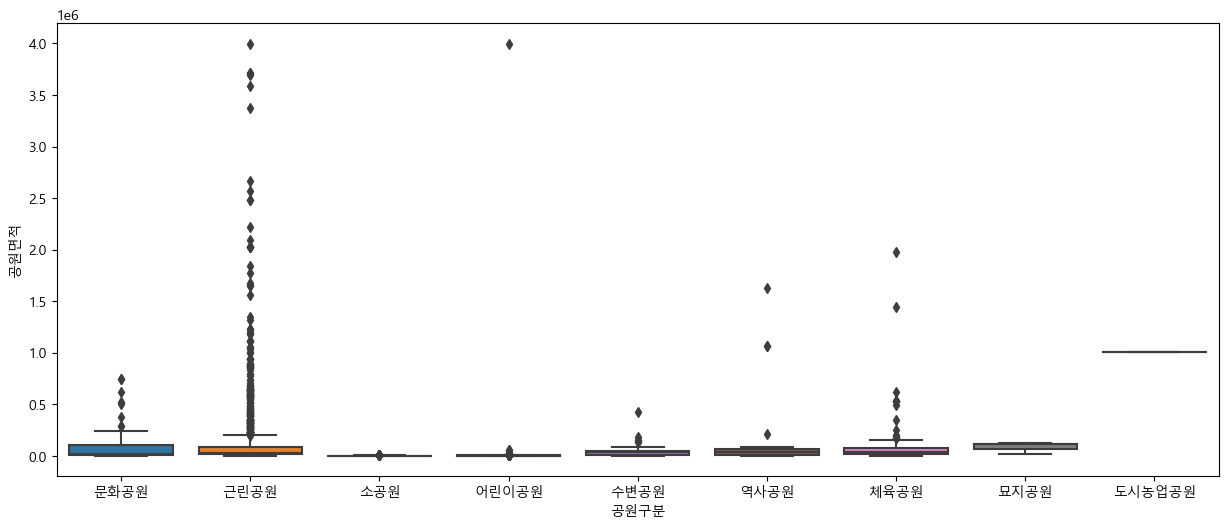

In [4]:
# dat1에서
# '공원보유시설(운동시설)'이 nan이 아닌 공원들에 대하여 '공원구분' 별로 '공원면적' boxplot을 그리시오

fig=plt.figure(figsize=(15,6), dpi=100)

#=== 코드작성 ===# 
df1 = dat1.loc[dat1['공원보유시설(운동시설)'].notnull()]
_=sns.boxplot(data = df1,
              x = '공원구분', y = '공원면적')

## 문제 2

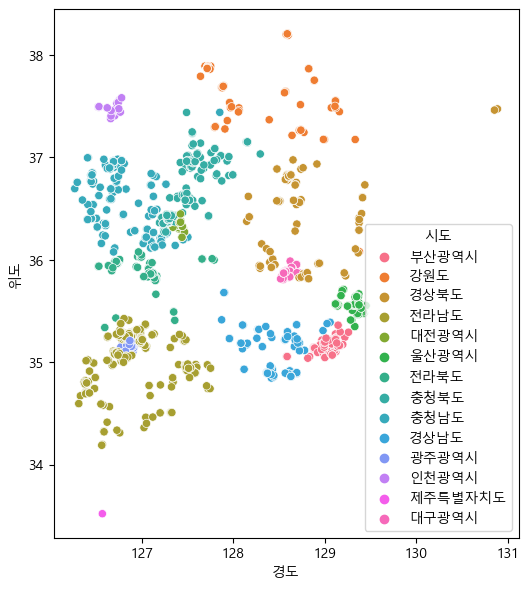

In [8]:
# dat1에서
# '경기도'와 '서울특별시'를 제외한 '시도'에 대하여 '공원구분'이 '소공원'인 공원의 위치(위도, 경도)를 scatter plot으로 나타내시오
# (시도별로 marker의 색깔은 다르게 하시오)

# 힌트) 조건 결과의 not 기호: '~' 사용

fig=plt.figure(figsize=(6,7), dpi=100)

#=== 코드작성 ===# 
df2 = dat1.loc[(dat1['시도']!='경기도')&(dat1['시도']!='서울특별시')&(dat1['공원구분']=='소공원')]

_=sns.scatterplot(data = df2,
                  x = '경도', y ='위도', hue='시도')

## 문제 3

<ipython-input-14-defcc9cdc6f4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['지역'] = df3['소재지지번주소'].map(f3)


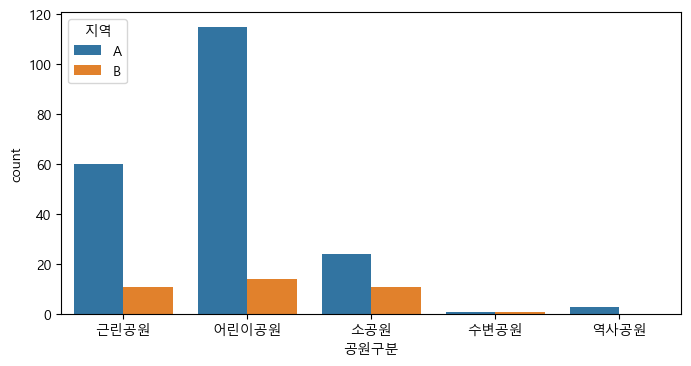

In [14]:
# 아래 주어진 df3에서
# '소재지지번주소'에 '송파구'또는'동작구'가 들어간 공원 (지역 A)와 '영덕군'또는'영양군'이 들어간 공원 (지역 B)에 대하여,
# 각 '공원구분'별 로 공원의 개수를 bar graph로 그리시오

fig=plt.figure(figsize=(8,4), dpi=100)
df3=dat1.loc[dat1["소재지지번주소"].str.contains('송파구|동작구|영덕군|영양군')]

#=== 코드작성 ===#) 
def f3(x):
    if x!=x:
        return np.nan
    elif '송파구' in x or '동작구' in x:
        return 'A'
    else:
        return 'B'
    
df3['지역'] = df3['소재지지번주소'].map(f3)

_=sns.countplot(data=df3,
                x = '공원구분', hue = '지역')

## 문제 4

<Figure size 1000x400 with 0 Axes>

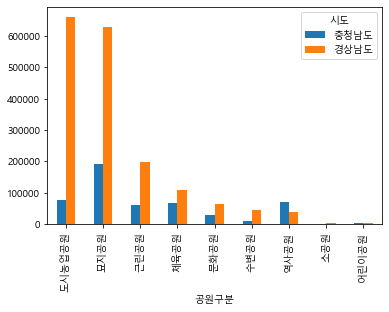

In [37]:
# dat1에서
# '충청남도'와 '경상남도'에 대하여, 공원구분 별 '공원면적의 평균' 그래프를 아래와 같이 bar graph나타내시오
# (단, 경상남도의 '공원면적 평균' 값으로 sorting 하여 그리시오)

fig=plt.figure(figsize=(10,4), dpi=100)

#=== 코드작성 ===# 
# dat1.head()
df4 = dat1.loc[(dat1['시도']=='충청남도')|(dat1['시도']=='경상남도')]
df44 = df4.groupby(['공원구분','시도'])['공원면적'].mean().unstack().sort_values(by='경상남도', ascending=False)
df444 = df44[['충청남도','경상남도']]

_=df444.plot.bar()

## 문제 5

In [92]:
# 문제4과 같은 bar graph를 그리는데,
# 충청남도의 공원면적 평균이 경상남도 공원면적 평균보다 큰 공원구분에 대해서만 그리시오
# (채점시 데이터 변경 가능, 눈으로 확인하여 해당 공원구분 명시적으로 입력하는것은 오답처리)

fig=plt.figure(figsize=(10,4), dpi=100)

#=== 코드작성 ===# 


,공원명,공원구분,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),전화번호,제공기관명,시도
1761,8호공원(장항읍),어린이공원,충청남도 서천군 장항읍 원수리 927-2,36.006113,126.704992,4536.0,NaN,041-950-4438,충청남도 서천군,충청남도
1762,(산단)1호,어린이공원,충청남도 서천군 장항읍 옥남리 520,36.040527,126.668551,1884.0,NaN,041-950-4438,충청남도 서천군,충청남도
1763,(산단)2호,어린이공원,충청남도 서천군 장항읍 옥남리 산3,36.035863,126.671152,1657.0,NaN,041-950-4438,충청남도 서천군,충청남도
1764,9호공원,소공원,충청남도 서천군 서천읍 군사리 524-2,36.077357,126.692572,1558.0,NaN,041-950-4438,충청남도 서천군,충청남도
1765,(종천2농단)1,소공원,충청남도 서천군 종천면 석촌리 산31,36.115727,126.706123,7158.0,NaN,041-950-4438,충청남도 서천군,충청남도


51431.63735600656

,공원명,공원구분,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),전화번호,제공기관명,시도
1770,1호공원,도시농업공원,충청남도 서천군 판교면 현암리 산7,36.158131,126.685807,76000.0,NaN,041-950-4438,충청남도 서천군,충청남도
1774,1호공원,근린공원,충청남도 서천군 장항읍 송림리 산58-57,36.021103,126.669041,74957.0,NaN,041-950-4438,충청남도 서천군,충청남도
1775,원수공원,근린공원,충청남도 서천군 장항읍 원수리 886-12,36.010613,126.706195,110701.0,NaN,041-950-4438,충청남도 서천군,충청남도
1781,왕개공원,근린공원,충청남도 서천군 장항읍 성주리 산23-3,36.021544,126.704566,114200.0,NaN,041-950-4438,충청남도 서천군,충청남도
1782,사곡공원,체육공원,충청남도 서천군 서천읍 사곡리 산10-2,36.088467,126.688697,175134.0,"궁도장,게이트볼장,테니스장",041-950-4438,충청남도 서천군,충청남도
...,...,...,...,...,...,...,...,...,...,...
14887,남산근린공원,근린공원,충청남도 아산시 온천동 266-133 일원,36.780325,126.996756,355370.0,NaN,NaN,충청남도 아산시,충청남도
15135,반포1공원,근린공원,충청남도 공주시 반포면 봉곡리 산7-1,36.404634,127.248490,85090.0,NaN,041-840-8557,충청남도 공주시,충청남도
15138,우야공원,근린공원,충청남도 공주시 금흥동 산45-11,36.479368,127.153254,70748.0,NaN,041-840-8557,충청남도 공주시,충청남도
15143,유구공원,근린공원,충청남도 공주시 유구읍 금계산로 76-1,36.558714,126.957129,148200.0,NaN,041-840-8557,충청남도 공주시,충청남도


<Figure size 1000x400 with 0 Axes>

# 문제 6~8 에 사용되는 dat2

In [120]:
dat2=pd.read_table("data/dat2.csv", sep=',', encoding='cp949')
dat2

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,포인트수학교습소,학문/교육,학원-보습교습입시,학원-입시,부산광역시,해운대구,우3동,우동,대지,1388,부산광역시 해운대구 우동 1388-10,부산광역시 해운대구 해운대해변로,83,부산광역시 해운대구 해운대해변로 83,129.142346,35.161664
1,탠디롯데센텀시티점,생활서비스,광고/인쇄,인쇄종합,부산광역시,해운대구,우2동,우동,대지,1496,부산광역시 해운대구 우동 1496,부산광역시 해운대구 센텀남대로,59,부산광역시 해운대구 센텀남대로 59,129.131099,35.169873
2,포인트,소매,의복의류,일반의류,부산광역시,부산진구,당감4동,당감동,대지,278,부산광역시 부산진구 당감동 278-7,부산광역시 부산진구 당감로,27,부산광역시 부산진구 당감로 27-1,129.039366,35.164187
3,봉가네도가니탕,음식,한식,부대찌개/섞어찌개,부산광역시,사하구,다대2동,다대동,대지,1582,부산광역시 사하구 다대동 1582-24,부산광역시 사하구 다송로72번길,43,부산광역시 사하구 다송로72번길 43,128.981851,35.060230
4,돼지야돼지야,음식,한식,갈비/삼겹살,부산광역시,사상구,주례2동,주례동,대지,60,부산광역시 사상구 주례동 60-20,부산광역시 사상구 가야대로,376,부산광역시 사상구 가야대로 376,129.013681,35.151028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,빨간모자,음식,분식,국수/만두/칼국수,부산광역시,부산진구,양정1동,양정동,대지,401,부산광역시 부산진구 양정동 401-9,부산광역시 부산진구 거제대로22번길,10,부산광역시 부산진구 거제대로22번길 10,129.068063,35.170418
9996,용감한사람들봉구칩스신세계몰점,음식,유흥주점,호프/맥주,부산광역시,해운대구,우2동,우동,대지,1493,부산광역시 해운대구 우동 1493,부산광역시 해운대구 센텀4로,15,부산광역시 해운대구 센텀4로 15,129.128311,35.169881
9997,지오헤어클럽,생활서비스,이/미용/건강,여성미용실,부산광역시,부산진구,전포1동,전포동,대지,378,부산광역시 부산진구 전포동 378-2,부산광역시 부산진구 황령대로74번길,30,부산광역시 부산진구 황령대로74번길 30,129.067392,35.148457
9998,선미오리불고기,음식,닭/오리요리,오리고기전문,부산광역시,부산진구,개금1동,개금동,산,43,부산광역시 부산진구 개금동 산43-51,부산광역시 부산진구 엄광로,57,부산광역시 부산진구 엄광로 57-10,129.022704,35.148473


## 문제 6

<Figure size 2000x400 with 0 Axes>

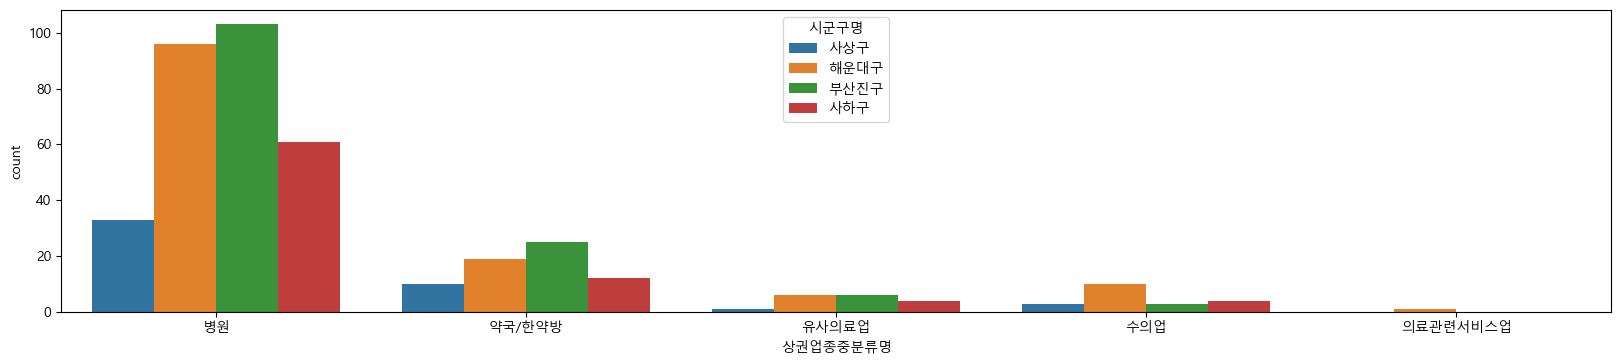

In [41]:
# '상권업종대분류명'이 '의료'인 상점에 대하여,
# '상권업종중분류명 별, '시군구명' 별 "상점수의 bar graph"를
# 'seaborn countplot'을 사용하여 아래그림과 같이 나타내시오

plt.figure(figsize=(20, 4), dpi=100)

#=== 코드작성 ===#
df6 = dat2.loc[dat2['상권업종대분류명']=='의료']

_=sns.countplot(data = df6,
                x = '상권업종중분류명', hue = '시군구명')

## 문제 7

기타고기요리        32
곱창/양구이전문      33
족발/보쌈전문       47
해장국/감자탕       65
갈비/삼겹살       128
한식/백반/한정식    619
Name: 상권업종소분류명, dtype: int64

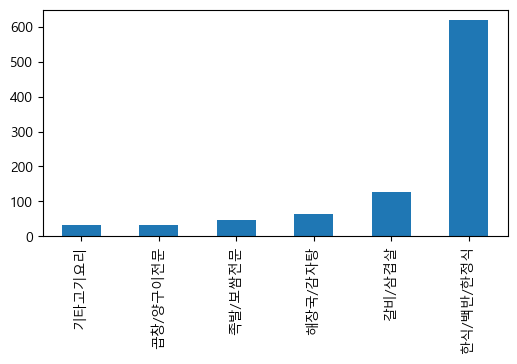

In [49]:
# '상권업종중분류명'이 '한식'인 상점에 대하여,
# '상권업종소분류명'별로 상점수를 bar graph로 그리는데, 아래의 3가지 조건을 만족하면서 그리시오
# (조건1, 상점의 개수가 30개 이상인 소분류에 대해서만 그린다)
# (조건2, 상점의 개수가 적은 순서로 그린다)
# (조건3, pandas plot bar를 사용한다)

fig=plt.figure(figsize=(6, 3), dpi=100)
ax1=fig.subplots()

#=== 코드작성 ===#
df7 = dat2.loc[dat2['상권업종중분류명']=='한식']

df77 = df7['상권업종소분류명'].value_counts()
df777 = df77[df77>=30].sort_values()
df777

_=df777.plot.bar(ax=ax1)

## 문제 8

In [133]:
# '상권업종소분류명'에 '주유소'문구가 포함된 상점은 빨간색 icon으로, '충전소'문구가 포함된 상점은 파란색 icon으로 지도에 나타내시오
# (marker는 tooltip 스타일로 하고, tooltip 문구는 상호명으로 하시오)

#=== 코드작성 ===#
lat = dat2['위도'].mean()
long = dat2['경도'].mean()

m = folium.Map([lat,long], tiles = 'Stamen Toner', zoom_start=11)

df8a = dat2.loc[dat2['상권업종소분류명'].str.contains('주유소')]
for i in df8a.index:
    t1 = dat2.loc[i, '상호명']
    lat = dat2.loc[i, '위도']
    long = dat2.loc[i, '경도']
    _=folium.Marker([lat,long], tooltip=t1, radius=3, icon=folium.Icon(color='red')).add_to(m)
    
df8b = dat2.loc[dat2['상권업종소분류명'].str.contains('충전소')]
for i in df8b.index:
    t1 = dat2.loc[i,'상호명']
    lat = dat2.loc[i,'위도']
    long = dat2.loc[i,'경도']
    _=folium.Marker([lat,long], tooltip=t1, radius=3, icon=folium.Icon(color='blue')).add_to(m)
    
m

# 문제 9~11 에 사용되는 dat3

In [50]:
dat3=pd.read_table("data/dat3.csv", sep=',', encoding='cp949')
dat3
# rows: 500명의 학생
# columns: 학년, 신청과목 (his, eng, mat 중 하나), 가입동아리 (A, B, C 중 중복 선택가능), 과목을 신청한 월

,학년,과목,동아리,과목신청월
0,3,his,B,12
1,1,eng,B,7
2,2,his,B,5
3,2,eng,"B,C",9
4,1,mat,B,4
...,...,...,...,...
495,3,his,"A,C",11
496,1,mat,"A,B",5
497,3,his,"A,B,C",12
498,3,his,B,12


## 문제 9

,학년,과목,동아리,과목신청월
0,3,his,B,12
1,1,eng,B,7
2,2,his,B,5
3,2,eng,"B,C",9
4,1,mat,B,4


1    149
2    122
3    153
Name: 학년, dtype: int64

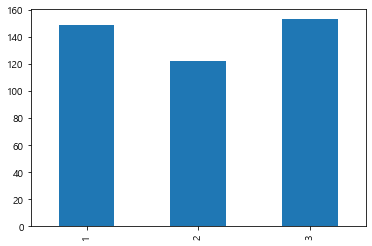

In [61]:
# 500명의 학생이 동아리에 가입하였다 (A, B, C 중 중복 선택가능)
# A 또는 C (A,C 둘다도 포함)에 가입한 학생들의 학년별 학생수를 bar graph로 나타내시오
# (B 동아리 가입 여부는 상관없음)

#=== 코드작성 ===#
dat3.head()
df9 = dat3.loc[dat3['동아리'].str.contains('A|C')]
df99 = df9['학년'].value_counts().sort_index()
df99

_=df99.plot.bar()

## 문제 10

,학년,과목,동아리,과목신청월
0,3,his,B,12
1,1,eng,B,7
2,2,his,B,5
3,2,eng,"B,C",9
4,1,mat,B,4
...,...,...,...,...
495,3,his,"A,C",11
496,1,mat,"A,B",5
497,3,his,"A,B,C",12
498,3,his,B,12


학년,1,2,3
과목신청월,,,
1,14,12,11
2,24,25,25
3,39,35,42
4,56,47,54
5,76,60,71
6,86,69,82
7,104,81,97
8,118,93,113
9,127,107,122


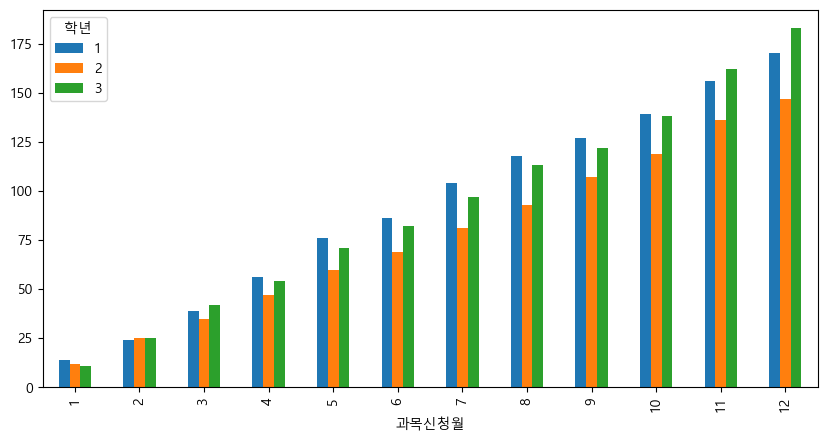

In [70]:
# 500명의 학생이 his, eng, mat 중에 하나를 선택하여 1월~12월 에 과목을 신청하였다.
# 학년별로 과목신청 월 별 누적 신청학생수를 bar graph로 나타내시오

fig=plt.figure(figsize=(10, 5), dpi=100)
ax1=fig.subplots()

#=== 코드작성 ===#
dat3
df10 = dat3[['과목신청월','학년']].value_counts().unstack().cumsum()
df10

_=df10.plot.bar(ax=ax1)

## 문제 11

,학년,과목,신청수,ind
2,1,mat,85,1-mat
3,2,eng,74,2-eng
7,3,his,102,3-his


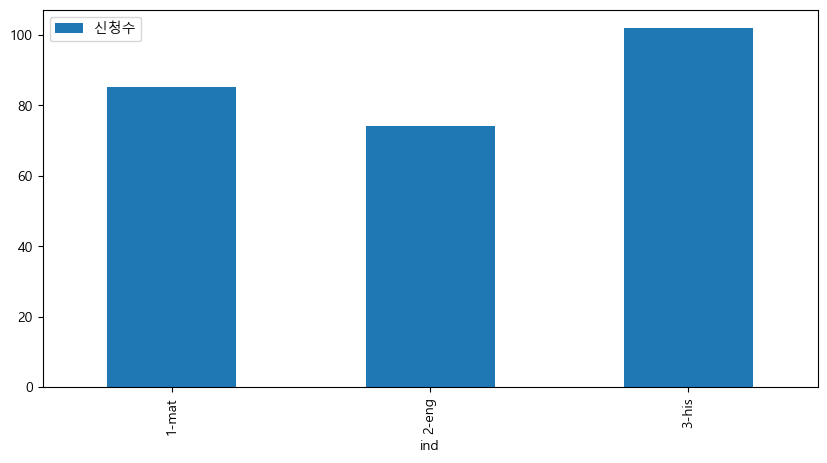

In [119]:
# 500명의 학생이 his, eng, mat 중에 하나를 선택하여 과목을 신청하였다.
# 학년별로 가장 많이 신청한 과목의 수를 bar graph로 그리시오
# (단, x축 tick label에 '학년'과 '가장많이 신청한과목'을 문자열로 나타내시오)
# (힌트: int 형인 series sr1를 str 형으로 변환하는 방법: sr1=sr1.astype(str))

# (아래의 subj_cnt 변수를 활용하여 코드를 작성하시오)
# (중간결과는 참고용, 출력할 필요 없음)

fig=plt.figure(figsize=(10,5),dpi=100)
ax=fig.subplots()

subj_cnt=dat3.groupby(['학년','과목'])['과목신청월'].count()

#=== 코드작성 ===#
df11 = subj_cnt.reset_index()
df11.columns = ['학년','과목','신청수']

df111 = df11.sort_values(by='신청수', ascending=False).iloc[:3].sort_values(by='학년')
df111['ind'] = df111['학년'].astype('str')+'-'+df111['과목']
df111

df1111 = df111.set_index('ind').drop(columns=['학년','과목'])

_=df1111.plot.bar(ax=ax)